In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
df = xr.open_dataset(fname)
df

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

# 1) Opening data and examining metadata

## 1.1) Open the dataset and display its contents

In [3]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 1.2) Print out the long_name attribute of each variable

In [4]:
for var in ds.data_vars:
    long_name = ds[var].attrs['long_name']  
    padding = 40 - len(var) 
    print(f'{var}:{" " * padding} {long_name}')

toa_sw_all_mon:                           Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon:                           Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon:                          Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon:                           Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon:                           Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon:                          Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon:                           Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon:                           Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon:                          Top of The Atmosphere Cloud Radiative Effects N

# 2) Basic reductions, arithmetic, and plotting

## 2.1) Calculate the time-mean of the entire dataset

In [5]:
time_mean = df.mean(dim='time')
time_mean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

## 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation

In [6]:
time_mean.toa_lw_all_mon

<xarray.DataArray 'toa_lw_all_mon' (lat: 180, lon: 360)>
array([[141.0882 , 141.0882 , 141.0882 , ..., 141.0882 , 141.0882 ,
        141.0882 ],
       [143.71472, 143.71472, 143.71472, ..., 143.71472, 143.71472,
        143.71472],
       [144.99655, 144.99655, 144.99655, ..., 144.99655, 144.99655,
        144.99655],
       ...,
       [194.35214, 194.35214, 194.35214, ..., 194.35214, 194.35214,
        194.35214],
       [194.11188, 194.11188, 194.11188, ..., 194.11188, 194.11188,
        194.11188],
       [194.10733, 194.10733, 194.10733, ..., 194.10733, 194.10733,
        194.10733]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

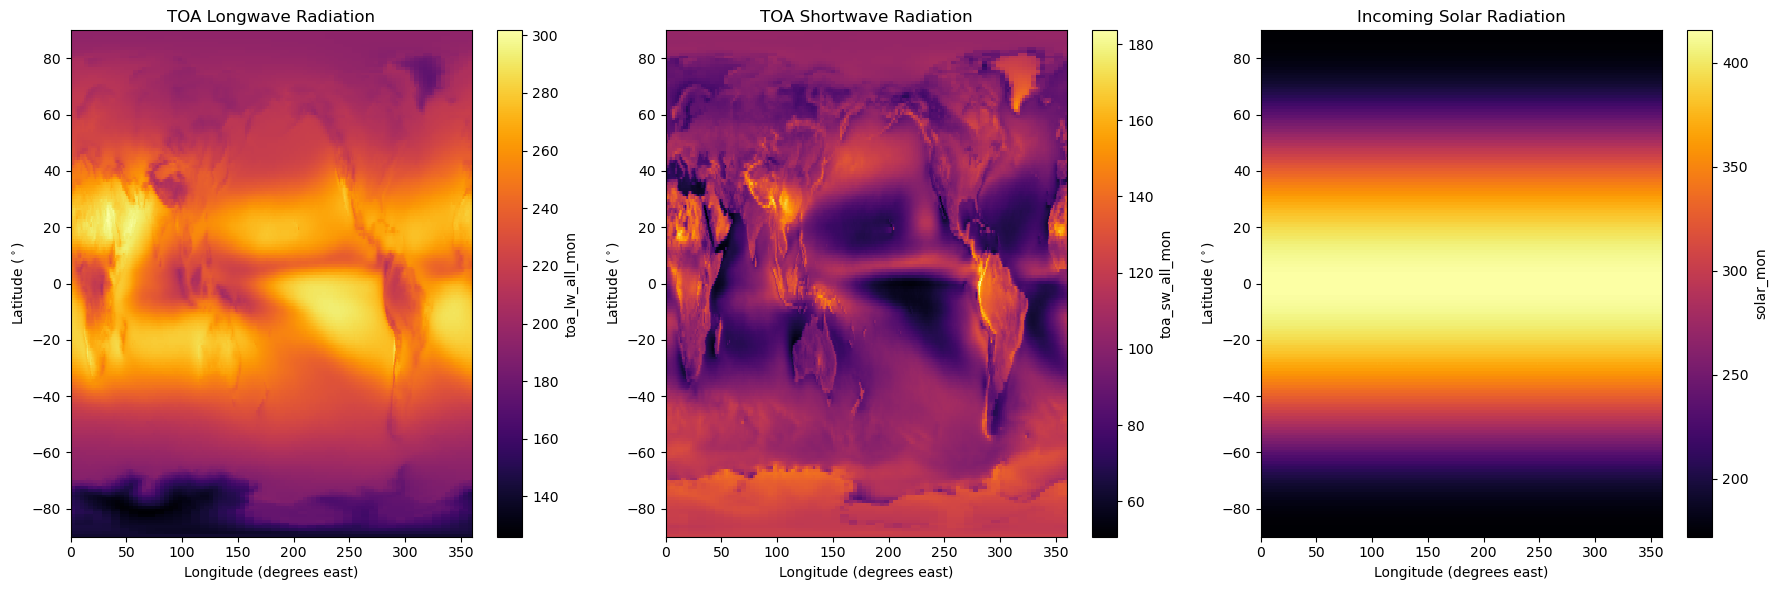

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


time_mean.toa_lw_all_mon.plot(ax=axes[0], cmap='inferno')
axes[0].set_title('TOA Longwave Radiation')
axes[0].set_xlabel('Longitude (degrees east)')
axes[0].set_ylabel('Latitude ($^\circ$)')

time_mean.toa_sw_all_mon.plot(ax=axes[1], cmap='inferno')
axes[1].set_title('TOA Shortwave Radiation')
axes[1].set_xlabel('Longitude (degrees east)')
axes[1].set_ylabel('Latitude ($^\circ$)')

time_mean.solar_mon.plot(ax=axes[2], cmap='inferno')
axes[2].set_title('Incoming Solar Radiation')
axes[2].set_xlabel('Longitude (degrees east)')
axes[2].set_ylabel('Latitude ($^\circ$)')

plt.tight_layout()
plt.show()

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

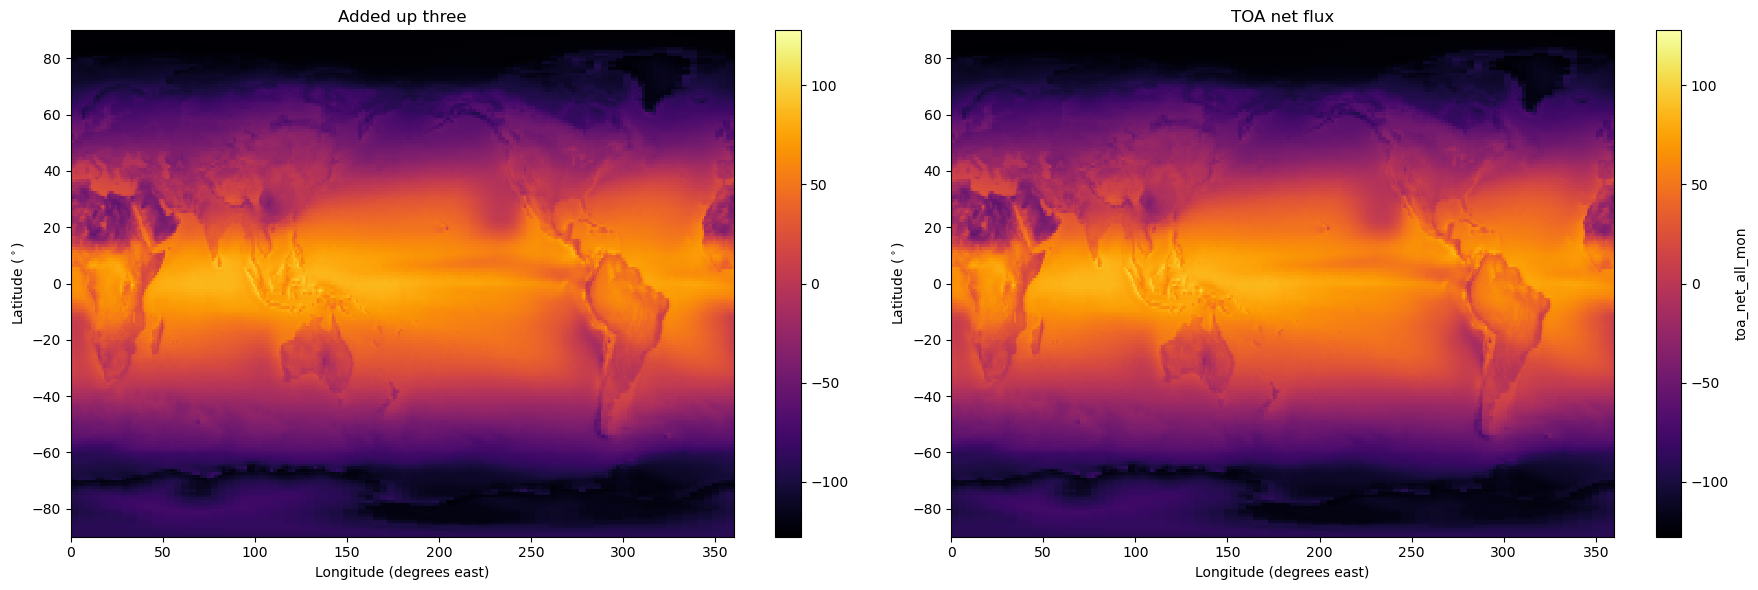

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

add = - time_mean.toa_lw_all_mon - time_mean.toa_sw_all_mon + time_mean.solar_mon

add.plot(ax=axes[0], cmap='inferno')
axes[0].set_title('Added up three')
axes[0].set_xlabel('Longitude (degrees east)')
axes[0].set_ylabel('Latitude ($^\circ$)')

time_mean.toa_net_all_mon.plot(ax=axes[1], cmap='inferno')
axes[1].set_title('TOA net flux')
axes[1].set_xlabel('Longitude (degrees east)')
axes[1].set_ylabel('Latitude ($^\circ$)')

plt.tight_layout()
plt.show()

# 3) Mean and weighted mean

## 3.1) Calculate the global (unweighted) mean of TOA net radiation

In [9]:
df.toa_net_all_mon.mean()

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

## 3.2) Create a weight array proportional to cos(lambda)

In [10]:
lat_rad = (time_mean.lat / 180) * np.pi
cos_lambda = np.cos(lat_rad)
weight_array = xr.DataArray(cos_lambda, dims=['lat'], coords={'lat': time_mean.lat})
weight_array

<xarray.DataArray 'lat' (lat: 180)>
array([0.00872656, 0.02617688, 0.04361933, 0.06104851, 0.07845908,
       0.09584564, 0.11320324, 0.13052613, 0.14780936, 0.16504757,
       0.18223551, 0.19936782, 0.21643965, 0.2334453 , 0.25037998,
       0.26723838, 0.28401536, 0.3007057 , 0.31730458, 0.3338068 ,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.41469318,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.50753826, 0.5224986 , 0.5372996 , 0.551937  , 0.5664062 ,
       0.58070296, 0.59482276, 0.6087614 , 0.6225146 , 0.6360782 ,
       0.649448  , 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.80385685, 0.8141155 ,
       0.8241262 , 0.8338858 , 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.8788171 , 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.93041754, 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.93041754, 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.8788171 , 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.8338858 , 0.8241262 ,
       0.8141155 , 0.80385685, 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.649448  ,
       0.6360782 , 0.6225146 , 0.6087614 , 0.59482276, 0.58070296,
       0.5664062 , 0.551937  , 0.5372996 , 0.5224986 , 0.50753826,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.41469318, 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.3338068 , 0.31730458, 0.3007057 , 0.28401536, 0.26723838,
       0.25037998, 0.2334453 , 0.21643965, 0.19936782, 0.18223551,
       0.16504757, 0.14780936, 0.13052613, 0.11320324, 0.09584564,
       0.07845908, 0.06104851, 0.04361933, 0.02617688, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

In [11]:
radiation_weighted_mean = df.toa_net_all_mon.weighted(weight_array).mean().values
radiation_weighted_mean

array(0.8780884, dtype=float32)

The net energy imbalance of the Earth by climate scientists' estimate is about 0.6 to 1 watt per square meter (W/m²) on average globally. Our calculation is 0.878 so within this range.

## 3.4) Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [12]:
longwave_weighted_mean = df.toa_lw_all_mon.weighted(weight_array).mean().values
shortwave_weighted_mean = df.toa_sw_all_mon.weighted(weight_array).mean().values
solar_weighted_mean = df.solar_mon.weighted(weight_array).mean().values
print('TOA outgoing longwave, outgoing shortwave, and incoming solar calculated are',longwave_weighted_mean,shortwave_weighted_mean,solar_weighted_mean,'respectively.')
print('TOA outgoing longwave, outgoing shortwave, and incoming solar read from infographic are 239.9, 99.9 and 340.4 respectively.')

TOA outgoing longwave, outgoing shortwave, and incoming solar calculated are 240.2669 99.13805 340.28326 respectively.
TOA outgoing longwave, outgoing shortwave, and incoming solar read from infographic are 239.9, 99.9 and 340.4 respectively.


# 4) Meridional Heat Transport Calculation

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

In [13]:
R = 6371
lat_rad = np.deg2rad(df.lat)
dlat_rad = np.deg2rad(np.diff(df.lat).mean()) 
dlon_rad = np.deg2rad(np.diff(df.lon).mean()) 
pixel_area = R**2 * np.cos(lat_rad) * dlat_rad * dlon_rad
pixel_area_da = xr.DataArray(pixel_area, coords=[df['lat']], dims=["lat"])
ones_lon = xr.ones_like(df.lon)  
pixel_area_2d = pixel_area_da * ones_lon  
total_pixel_area = pixel_area_2d.sum().values  
total_area_earth = 4 * np.pi * (R**2)
total_area_earth
print(f'Total Pixel Area: {total_pixel_area}')
print(f'Earth True Surface Area: {total_area_earth}')

Total Pixel Area: 510070941.6521716
Earth True Surface Area: 510064471.90978825


## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

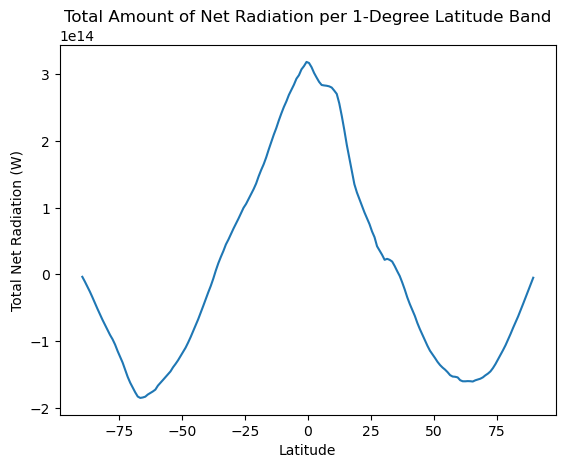

In [14]:
pixel_area_2d_m2 = pixel_area_2d * 1e6
total_radiation_per_latitude_band = (pixel_area_2d_m2 * time_mean.toa_net_all_mon).sum(dim='lon')
total_radiation_per_latitude_band.plot()

plt.xlabel('Latitude')
plt.ylabel('Total Net Radiation (W)')
plt.title('Total Amount of Net Radiation per 1-Degree Latitude Band')
plt.show()

## 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

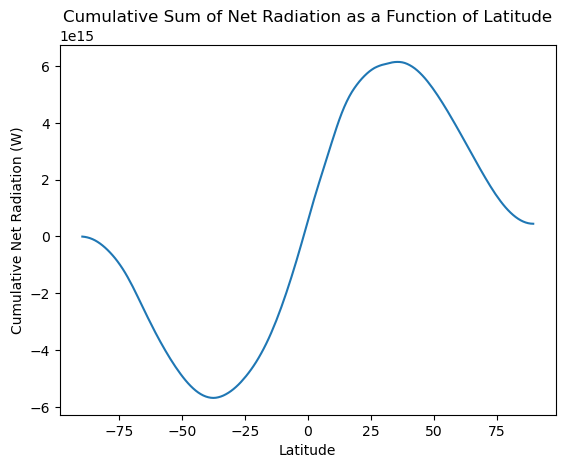

In [15]:
cumulative_total_radiation = total_radiation_per_latitude_band.cumsum(dim='lat')

cumulative_total_radiation.plot()

plt.xlabel('Latitude')
plt.ylabel('Cumulative Net Radiation (W)')
plt.title('Cumulative Sum of Net Radiation as a Function of Latitude')
plt.show()


# 5) Selecting and Merging Data

## 5.1) Create a Dataset for each point from the global dataset

In [16]:
NYC = df.sel(lon=360-74, lat=40, method='nearest')
NA = df.sel(lon=360-165, lat=64, method='nearest')
CSL = df.sel(lon=80, lat=7, method='nearest')
HT = df.sel(lon=147, lat=-43, method='nearest')

In [17]:
NYC_solar = NYC.solar_mon
NYC_net = NYC.toa_net_all_mon

NA_solar = NA.solar_mon
NA_net = NA.toa_net_all_mon

CSL_solar = CSL.solar_mon
CSL_net = CSL.toa_net_all_mon

HT_solar = HT.solar_mon
HT_net = HT.toa_net_all_mon

## 5.2) Merge these four datasets into a new dataset with the new dimension city

In [18]:
datasets = [NYC, NA, CSL, HT]
city_names = ['NYC', 'Nome, Alaska', 'Columbo, Sri Lanka', 'Hobart, Tasmania']
merged_dataset = xr.concat(datasets, dim=xr.DataArray(city_names, dims='city', name='city'))
merged_dataset

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
  * city                         (city) <U18 'NYC' ... 'Hobart, Tasmania'
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 89.36 155.3 ... 137.6
    toa_lw_all_mon               (city, time) float32 223.2 216.2 ... 259.2
    toa_net_all_mon              (city, time) float32 8.813 31.08 ... 97.02
    toa_sw_clr_mon               (city, time) float32 38.75 47.61 ... 75.11
    toa_lw_clr_mon               (city, time) float32 253.2 259.4 ... 284.6
    toa_net_clr_mon              (city, time) float32 29.48 95.62 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -20.66 -64.55 ... -37.13
    solar_mon                    (city, time) float32 321.4 402.6 ... 493.8
    cldarea_total_daynight_mon   (city, time) float32 56.61 71.12 ... 46.37
    cldpress_total_daynight_mon  (city, time) float32 574.6 510.1 ... 641.1
    cldtemp_total_daynight_mon   (city, time) float32 250.3 247.7 ... 265.2
    cldtau_total_day_mon         (city, time) float32 5.157 11.39 ... 6.653
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 5.3) Plot the incoming solar and net radiation at each city

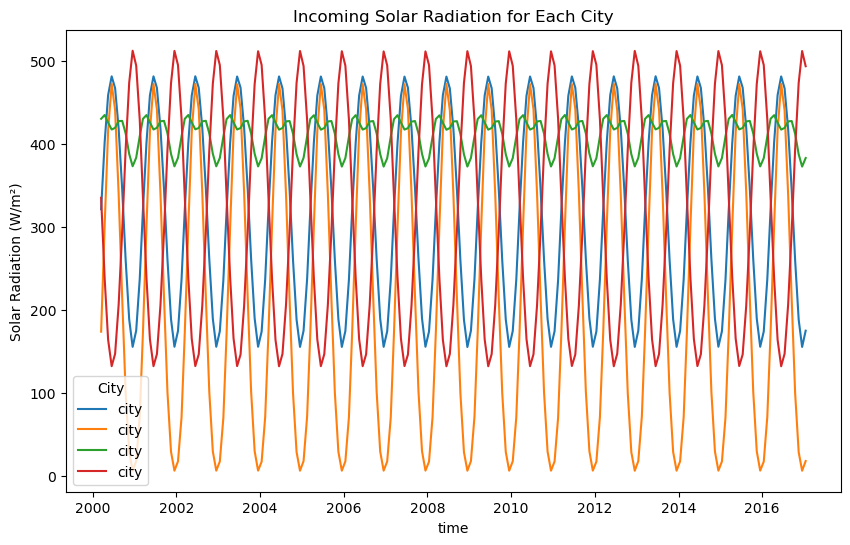

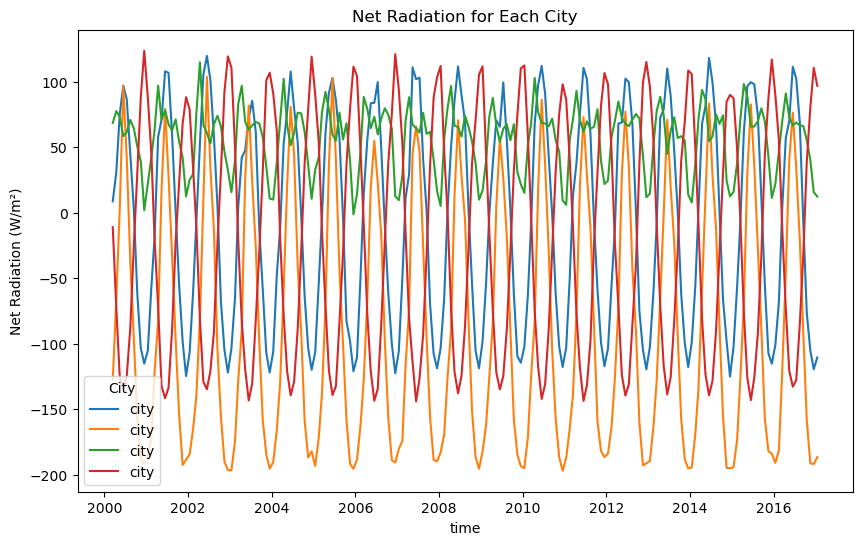

In [19]:
plt.figure(figsize=(10, 6))
for city in merged_dataset.city.values:
    merged_dataset.solar_mon.sel(city=city).plot(label='city')
plt.title('Incoming Solar Radiation for Each City')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend(title='City')
plt.show()

plt.figure(figsize=(10, 6))
for city in merged_dataset.city.values:
    merged_dataset.toa_net_all_mon.sel(city=city).plot(label='city')
plt.title('Net Radiation for Each City')
plt.ylabel('Net Radiation (W/m²)')
plt.legend(title='City')
plt.show()

